In [1]:
!pip install -qq git+https://github.com/cocodataset/panopticapi.git

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/EVA6/Capstone/detr-mine-panoptic.zip -d /content/

Archive:  /content/drive/MyDrive/EVA6/Capstone/detr-mine-panoptic.zip
   creating: /content/detr/
   creating: /content/detr/.vs/
   creating: /content/detr/.vs/detr/
   creating: /content/detr/.vs/detr/v15/
  inflating: /content/detr/.vs/detr/v15/.suo  
  inflating: /content/detr/.vs/slnx.sqlite  
  inflating: /content/detr/.vs/VSWorkspaceState.json  
   creating: /content/detr/d2/
   creating: /content/detr/d2/configs/
  inflating: /content/detr/d2/configs/detr_256_6_6_torchvision.yaml  
  inflating: /content/detr/d2/configs/detr_segm_256_6_6_torchvision.yaml  
  inflating: /content/detr/d2/converter.py  
   creating: /content/detr/d2/detr/
  inflating: /content/detr/d2/detr/config.py  
  inflating: /content/detr/d2/detr/dataset_mapper.py  
  inflating: /content/detr/d2/detr/detr.py  
  inflating: /content/detr/d2/detr/__init__.py  
  inflating: /content/detr/d2/README.md  
  inflating: /content/detr/d2/train_net.py  
   creating: /content/detr/datasets/
   creating: /content/detr/da

In [4]:
cd detr/

/content/detr


In [5]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.9.0+cu111 True


In [6]:
!nvidia-smi

Tue Nov  9 12:46:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    26W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
# Get pretrained weights
checkpoint_resume = torch.load(
                    "/content/drive/MyDrive/EVA6/Capstone/outputs_panoptic/checkpoint.pth",
                    map_location='cpu')
# Save
torch.save(checkpoint_resume,
           'resume_checkpoint.pth')

In [8]:
# Get pretrained weights
checkpoint_frozen = torch.load(
                    "/content/drive/MyDrive/EVA6/Capstone/outputs/checkpoint.pth",
                     map_location='cpu')
# Save
torch.save(checkpoint_frozen,
           'resume_checkpoint_frozen.pth')

In [ ]:
!echo $TCMALLOC_LARGE_ALLOC_REPORT_THRESHOLD
!export TCMALLOC_LARGE_ALLOC_REPORT_THRESHOLD=7516192768 

In [ ]:
!python main.py \
--dataset_file "custom_construction_panoptic" \
--data_path "/content/drive/MyDrive/EVA6/Capstone/dataset" \
--data_panoptic_path "/content/drive/MyDrive/EVA6/Capstone/dataset" \
--output_dir "/content/drive/MyDrive/EVA6/Capstone/outputs_panoptic" \
--masks \
--frozen_weights "resume_checkpoint_frozen.pth" \
--resume "resume_checkpoint.pth" \
--batch_size 1 \
--epochs 50



# --eval \
# --resume "resume_checkpoint.pth" \
# --lr_drop 15 \

Streaming output truncated to the last 5000 lines.
Epoch: [45]  [ 4860/10132]  eta: 0:23:34  lr: 0.000100  class_error: 18.75  loss: 2.4553 (3.7359)  loss_ce: 0.0416 (0.2124)  loss_bbox: 0.1694 (0.1679)  loss_giou: 0.0746 (0.1443)  loss_mask: 0.0336 (0.0753)  loss_dice: 0.2530 (0.3339)  loss_ce_0: 0.0636 (0.2579)  loss_bbox_0: 0.1367 (0.1894)  loss_giou_0: 0.0984 (0.1611)  loss_ce_1: 0.0497 (0.2458)  loss_bbox_1: 0.1756 (0.1773)  loss_giou_1: 0.0911 (0.1519)  loss_ce_2: 0.0386 (0.2307)  loss_bbox_2: 0.1606 (0.1750)  loss_giou_2: 0.0949 (0.1503)  loss_ce_3: 0.0482 (0.2163)  loss_bbox_3: 0.1183 (0.1712)  loss_giou_3: 0.0707 (0.1470)  loss_ce_4: 0.0527 (0.2102)  loss_bbox_4: 0.1815 (0.1711)  loss_giou_4: 0.0823 (0.1470)  loss_ce_unscaled: 0.0416 (0.2124)  class_error_unscaled: 0.0000 (15.6808)  loss_bbox_unscaled: 0.0339 (0.0336)  loss_giou_unscaled: 0.0373 (0.0722)  cardinality_error_unscaled: 1.0000 (1.6733)  loss_mask_unscaled: 0.0336 (0.0753)  loss_dice_unscaled: 0.2530 (0.3339)  loss

In [10]:
from util.plot_utils import plot_logs

from pathlib import Path

log_directory = [Path('/content/drive/MyDrive/EVA6/Capstone/outputs_panoptic/')]

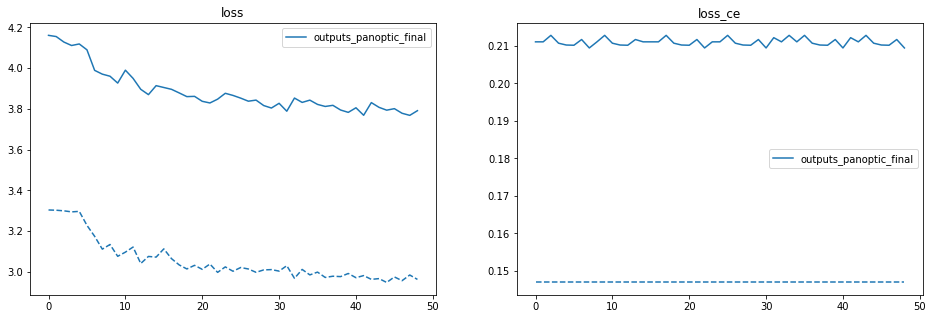

In [11]:
fields_of_interest = (
    'loss',
    'loss_ce',
    )

plot_logs(log_directory,
          fields_of_interest)

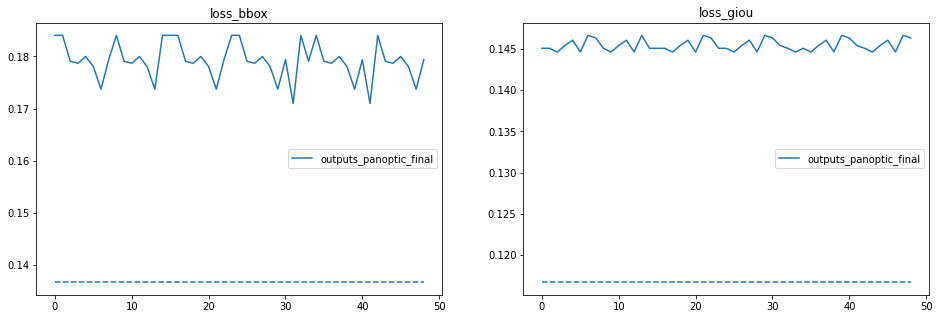

In [12]:
fields_of_interest = (
    'loss_bbox',
    'loss_giou',
    )

plot_logs(log_directory,
          fields_of_interest)

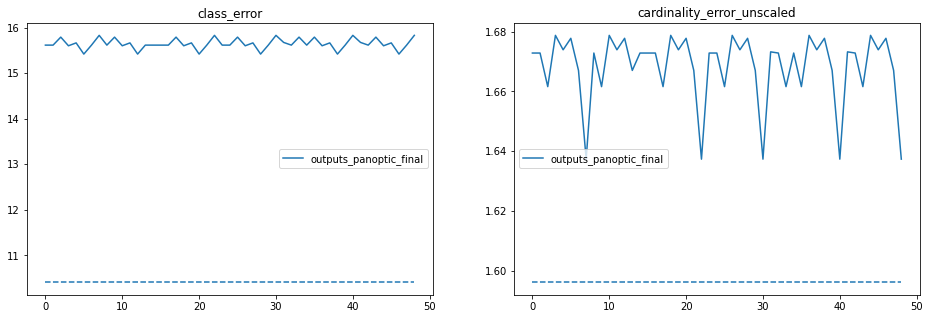

In [13]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)  